In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

In [590]:
df = pd.read_table('anonymized-curriculum-access.txt')

In [112]:
df.head()

,2018-01-26 09:55:03 / 1 8 97.105.19.61
0,2018-01-26 09:56:02 java-ii 1 8 97.105.19.61
1,2018-01-26 09:56:05 java-ii/object-oriented-pr...
2,2018-01-26 09:56:06 slides/object_oriented_pro...
3,2018-01-26 09:56:24 javascript-i/conditionals ...
4,2018-01-26 09:56:41 javascript-i/loops 2 22 97...


In [113]:
df.columns = ['entry']

In [114]:
df.entry[0].split()

['2018-01-26', '09:56:02', 'java-ii', '1', '8', '97.105.19.61']

In [115]:
df = df.entry.str.split(expand=True)
df

,0,1,2,3,4,5
0,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61
1,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
3,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61
4,2018-01-26,09:56:41,javascript-i/loops,2,22,97.105.19.61
...,...,...,...,...,...,...
900217,2021-04-21,16:41:51,jquery/personal-site,64,28,71.150.217.33
900218,2021-04-21,16:42:02,jquery/mapbox-api,64,28,71.150.217.33
900219,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33
900220,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28,24.160.137.86


In [116]:
df[4].value_counts()

28                 84031
33                 40730
29                 38096
62                 37109
53                 36902
                   ...  
155.91.49.181          1
174.207.7.215          1
172.5.98.113           1
165.237.199.136        1
107.77.228.136         1
Name: 4, Length: 442, dtype: int64

In [117]:
df = df.drop(columns=1)

In [118]:
df.columns = ['date', 'page', 'user', 'cohort', 'ip']

In [119]:
df

,date,page,user,cohort,ip
0,2018-01-26,java-ii,1,8,97.105.19.61
1,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61
2,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61
3,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61
4,2018-01-26,javascript-i/loops,2,22,97.105.19.61
...,...,...,...,...,...
900217,2021-04-21,jquery/personal-site,64,28,71.150.217.33
900218,2021-04-21,jquery/mapbox-api,64,28,71.150.217.33
900219,2021-04-21,jquery/ajax/weather-map,64,28,71.150.217.33
900220,2021-04-21,anomaly-detection/discrete-probabilistic-methods,744,28,24.160.137.86


In [120]:
df.page.value_counts()

/                                                               50312
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
12-distributed-ml/6.1-prepare-part-1                                1
12-distributed-ml/6.4-prepare-part-4                                1
4-python                                                            1
4-python/overview                                                   1
appendix/professional-development/post-interview-review-form        1
Name: page, Length: 2314, dtype: int64

In [121]:
df.cohort.astype(str).value_counts()

28                 84031
33                 40730
29                 38096
62                 37109
53                 36902
                   ...  
155.91.49.181          1
174.207.7.215          1
172.5.98.113           1
165.237.199.136        1
107.77.228.136         1
Name: cohort, Length: 442, dtype: int64

In [122]:
df[df.ip.isnull()].index

Int64Index([   410,    411,    424,    434,    435,    436,    437,    438,
               439,    440,
            ...
            899891, 899892, 899893, 899894, 899895, 899896, 899897, 899898,
            899899, 899901],
           dtype='int64', length=52474)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900222 entries, 0 to 900221
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    900222 non-null  object
 1   page    900222 non-null  object
 2   user    900222 non-null  object
 3   cohort  900222 non-null  object
 4   ip      847748 non-null  object
dtypes: object(5)
memory usage: 34.3+ MB


In [124]:
# for spot in [410, 411]:
#     print(spot)
#     df.ip.iloc[spot] = df.cohort.iloc[spot]
#     df.cohort.iloc[spot] = 0

In [125]:
# df.iloc[410:412]

In [126]:
for spot in temp:
    print(spot)
    df.ip.iloc[spot] = df.cohort.iloc[spot]
    df.cohort.iloc[spot] = 0

410
411
424
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
457
458
459
462
464
465
466
467
468
469
487
498
504
562
563
564
565
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
989
990
994
995
1209
1210
1211
1212
1213
1248
1249
1250
1251
1315
1316
1317
1320
1370
1371
1384
1385
1386
1388
1389
1390
1391
1402
1403
1419
1590
1634
1635
1636
2050
2112
2113
2263
2264
2265
2266
2267
2268
2301
2304
2306
2309
2313
2314
2318
2319
2364
2385
2386
2390
2391
2392
2393
2394
2395
2396
2397
2398
2441
2442
2443
2444
2445
2446
2447
2449
2450
2463
2464
2465
2466
2467
2470
2471
2472
2473
2474
3058
3063
3064
3066
3067
3068
3069
3093
3095
3102
3103
3104
3112
3114
3115
3116
3117
3118
3119
3120
3121
3122
3162
3163
3204
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3244
3245
3246
3252
3253
3254
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3660
3667
3668
3669
3670
3729
3730
3731
3732

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900222 entries, 0 to 900221
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    900222 non-null  object
 1   page    900222 non-null  object
 2   user    900222 non-null  object
 3   cohort  900222 non-null  object
 4   ip      900222 non-null  object
dtypes: object(5)
memory usage: 34.3+ MB


In [131]:
df[df.cohort == 'nan'].user.value_counts()

88     308
247     66
103     46
Name: user, dtype: int64

In [138]:
df[df.user == '103'].cohort.value_counts()

nan    46
Name: cohort, dtype: int64

In [139]:
t2 = df[(df.user == '88')& (df.cohort == 'nan')].index

In [140]:
for spot in t2:
    df.cohort.iloc[spot] = 0

In [141]:
t2 = df[(df.user == '247')& (df.cohort == 'nan')].index
for spot in t2:
    df.cohort.iloc[spot] = 0

In [142]:
t2 = df[(df.user == '103')& (df.cohort == 'nan')].index
for spot in t2:
    df.cohort.iloc[spot] = 0

In [144]:
df.cohort = df.cohort.astype(int)

In [147]:
df.user = df.user.astype(int)

In [150]:
df.date = pd.to_datetime(df.date)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900222 entries, 0 to 900221
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    900222 non-null  datetime64[ns]
 1   page    900222 non-null  object        
 2   user    900222 non-null  int64         
 3   cohort  900222 non-null  int64         
 4   ip      900222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 34.3+ MB


In [152]:
df.to_csv('clean_curriculum_access.csv')

In [591]:
df = pd.read_csv('clean_curriculum_access.csv').iloc[:,1:]

In [592]:
df.head()

,date,page,user,cohort,ip
0,2018-01-26,java-ii,1,8,97.105.19.61
1,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61
2,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61
3,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61
4,2018-01-26,javascript-i/loops,2,22,97.105.19.61


In [593]:
c = pd.read_csv('cohorts.csv')

In [594]:
c.head()

,id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [598]:
df = df.merge(c, how='left', left_on=df.cohort, right_on=c.id)
df

,key_0,date,page,user,cohort,ip,id,name,start_date,end_date,program_id
0,8,2018-01-26,java-ii,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,8,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,8,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,22,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
4,22,2018-01-26,javascript-i/loops,2,22,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...,...,...,...
900217,28,2021-04-21,jquery/personal-site,64,28,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2.0
900218,28,2021-04-21,jquery/mapbox-api,64,28,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2.0
900219,28,2021-04-21,jquery/ajax/weather-map,64,28,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2.0
900220,28,2021-04-21,anomaly-detection/discrete-probabilistic-methods,744,28,24.160.137.86,28.0,Staff,2014-02-04,2014-02-04,2.0


In [600]:
df = df.drop(columns=['key_0', 'id'])
df

,date,page,user,cohort,ip,name,start_date,end_date,program_id
0,2018-01-26,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
4,2018-01-26,javascript-i/loops,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...,...
900217,2021-04-21,jquery/personal-site,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0
900218,2021-04-21,jquery/mapbox-api,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0
900219,2021-04-21,jquery/ajax/weather-map,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0
900220,2021-04-21,anomaly-detection/discrete-probabilistic-methods,744,28,24.160.137.86,Staff,2014-02-04,2014-02-04,2.0


In [494]:
df.groupby(['date', 'user']).page.count()

date        user
2018-01-26  1        6
            2       17
            3       22
            4       14
            5       14
                    ..
2021-04-21  976      3
            977      4
            978      6
            979      5
            981      8
Name: page, Length: 77429, dtype: int64

In [495]:
df.page.value_counts()

/                                                               50312
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
12-distributed-ml/6.1-prepare-part-1                                1
12-distributed-ml/6.4-prepare-part-4                                1
4-python                                                            1
4-python/overview                                                   1
appendix/professional-development/post-interview-review-form        1
Name: page, Length: 2314, dtype: int64

In [496]:
pages = df.page.str.split('/',n=1, expand=True)

In [497]:
pages[1].value_counts().head(10)

                                                                50312
search_index.json                                               21429
introduction                                                    17323
functions                                                       12164
arrays                                                          11265
tables                                                           7771
introduction/working-with-data-types-operators-and-variables     7642
javascript-with-html                                             7350
databases                                                        7345
servlets                                                         7174
Name: 1, dtype: int64

In [498]:
df.date = pd.to_datetime(df.date)

In [499]:
df = df.set_index('date')

In [500]:
df.head()

,page,user,cohort,ip
date,,,,
2018-01-26,java-ii,1,8,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61
2018-01-26,javascript-i/loops,2,22,97.105.19.61


In [501]:
df[(df.page.str[-5:] == '.html') & (df.user == 53)].page.value_counts()

index.html                                              1477
examples/javascript/dom-query-js.html                     26
examples/css/twitter.html                                 23
examples/css/messages.html                                21
examples/css/login-form.html                              18
examples/css/media-queries.html                           15
examples/javascript/defuse-the-bom.html                   15
examples/css/css_selectors.html                           11
appendix/further-reading/javascript/hoisting.html          6
examples/css/bootstrap-grids.html                          5
examples/javascript/ajax-store.html                        5
content/git/initializing-a-repository.html                 2
content/git/creating-a-repository.html                     2
content/html-css/elements.html                             1
content/javascript_ii/ajax-api.html                        1
content/javascript_ii/es6.html                             1
content/git/committing.h

In [502]:
# User 53 is probably webscraping

<AxesSubplot:xlabel='cohort'>

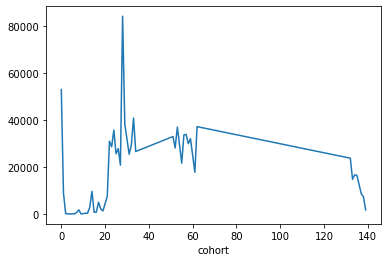

In [503]:
df.groupby('cohort').page.count().plot()

In [504]:
u = pd.DataFrame(df.user.value_counts()).reset_index().rename(columns={'index':'user',
                                                                    'user':'count'})

In [505]:
u.user.nunique()

981

In [506]:
pages_by_user = pd.DataFrame(df.groupby(['cohort']).page.count().reset_index()).rename(columns={
'page':'pages_visited'
})
pages_by_user

,cohort,pages_visited
0,0,52894
1,1,8890
2,2,93
3,4,4
4,5,1
5,6,72
6,7,598
7,8,1711
8,9,5
9,11,253


In [507]:
df

,page,user,cohort,ip
date,,,,
2018-01-26,java-ii,1,8,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61
2018-01-26,javascript-i/loops,2,22,97.105.19.61
...,...,...,...,...
2021-04-21,jquery/personal-site,64,28,71.150.217.33
2021-04-21,jquery/mapbox-api,64,28,71.150.217.33
2021-04-21,jquery/ajax/weather-map,64,28,71.150.217.33


In [508]:
# df['pages_visited'] = 
df = df.merge(pages_by_user, how='left', on=['cohort']).set_index(df.index)

In [509]:
df2 = pages_by_user[['pages_visited']]

In [510]:
scaler = MinMaxScaler().fit(df2)
scaled_t = scaler.transform(df2)

In [511]:
cols = [col+'_scaled' for col in df2.columns]
cols

['pages_visited_scaled']

In [512]:
scaled_t = pd.DataFrame(scaled_t, columns=cols, index=df2.index)

In [513]:
scaled_t

,pages_visited_scaled
0,0.629454
1,0.105784
2,0.001095
3,0.000036
4,0.000000
5,0.000845
6,0.007105
7,0.020350
8,0.000048
9,0.002999


In [514]:
dbsc = DBSCAN(eps=.1, min_samples=20).fit(scaled_t)

In [515]:
scaled_t.index

RangeIndex(start=0, stop=48, step=1)

In [516]:
df2['labels'] = dbsc.labels_

In [517]:
df2[df2.labels == -1]

,pages_visited,labels
0,52894,-1
19,30926,-1
20,28534,-1
21,35636,-1
22,25586,-1
23,27749,-1
24,20743,-1
25,84031,-1
26,38096,-1
27,25359,-1


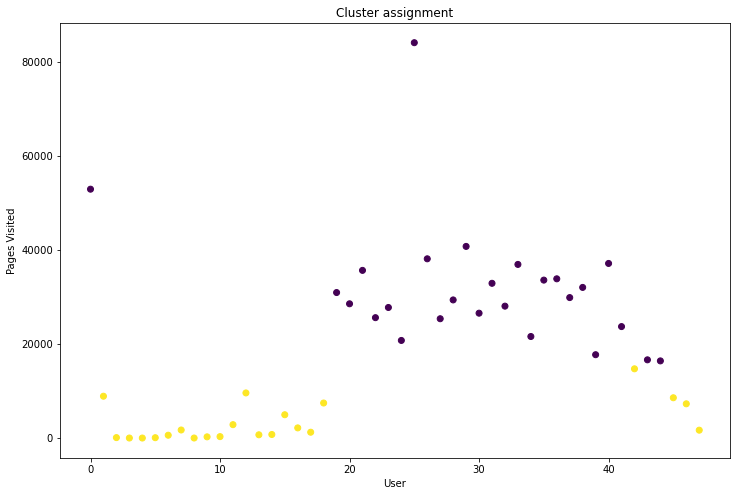

In [518]:
plt.figure(figsize=(12,8))
plt.scatter(df2.index, df2['pages_visited'], c=df2['labels'])
plt.xlabel('User')
plt.ylabel('Pages Visited')
plt.title('Cluster assignment')
plt.show()

----

In [519]:
df

,page,user,cohort,ip,pages_visited
date,,,,,
2018-01-26,java-ii,1,8,97.105.19.61,1711
2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,1711
2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,1711
2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,30926
2018-01-26,javascript-i/loops,2,22,97.105.19.61,30926
...,...,...,...,...,...
2021-04-21,jquery/personal-site,64,28,71.150.217.33,84031
2021-04-21,jquery/mapbox-api,64,28,71.150.217.33,84031
2021-04-21,jquery/ajax/weather-map,64,28,71.150.217.33,84031


In [528]:
wd = df[df.lesson == 'html-css'].cohort.unique()

In [535]:
wd = wd.tolist()

In [567]:
wd.remove(34)

In [569]:
program = []
for spot in df.cohort:
    if spot in wd:
        program.append('wd')
    else:
        program.append('ds')

In [570]:
df['program'] = program

In [571]:
df.program.value_counts()

wd    796801
ds    103421
Name: program, dtype: int64

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [572]:
df['lesson'] = df.page.str.split('/',1,True)[0].values

In [573]:
test = df.page.str.split('/',2,True)

In [574]:
lessons = pd.DataFrame(df[df.program == 'ds'].groupby(['cohort', 'lesson'], group_keys=False).page.count().reset_index())

In [575]:
lessons.head()

,cohort,lesson,page
0,4,,1
1,4,mkdocs,1
2,4,prework,2
3,5,,1
4,9,,1


In [576]:
lessons.columns = ['cohort', 'lesson', 'visit_count']

In [577]:
results = {}
for co in lessons.cohort.unique():
    n = 0
    temp = lessons[lessons.cohort == co].reset_index()
    m = temp.visit_count.max()
    # print(f'cohort: {co}')
    for spot in temp.visit_count:
        # print(f'spot: {spot}')
        if spot == m:
            results[co] = {'lesson':str(temp.lesson[n]),
                           'visits':m}
        n += 1

In [578]:
pd.DataFrame(results).T

,lesson,visits
4,prework,2
5,,1
9,content,4
34,1-fundamentals,3124
55,3-sql,2499
59,classification,5030
133,classification,2715
137,fundamentals,3451


In [579]:
# Javascript-i for webdev
# classification for ds

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [580]:
hold = df[df.program == 'wd'].groupby(['cohort', 'lesson']).lesson.count()
gloss = pd.DataFrame(data=hold, index=hold.index).rename(columns=({'lesson':'count'})).reset_index()

In [581]:
pd.DataFrame(df[df.program == 'wd'].groupby(['lesson']).page.count()).page.sort_values().tail(10)

lesson
javascript-ii     38792
java-i            41150
                  41951
java-ii           55102
java-iii          56729
spring            58595
jquery            60865
mysql             82311
html-css          84909
javascript-i     118711
Name: page, dtype: int64

<AxesSubplot:xlabel='cohort', ylabel='count'>

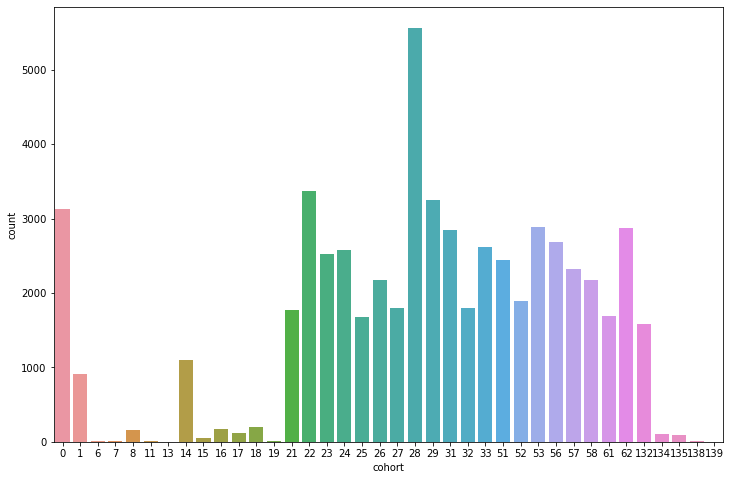

In [582]:
plt.figure(figsize=(12,8))
sns.barplot(data=gloss[gloss.lesson == 'spring'], x='cohort', y='count')

In [583]:
# cohort 28 hit the spring lesson really hard

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [584]:
df[df.pages_visited < 100].user.unique()

array([ 85, 144, 152, 280, 283, 396, 405, 649])

In [585]:
df[df.user == 283]

,page,user,cohort,ip,pages_visited,program,lesson
date,,,,,,,
2018-10-16,/,283,6,110.78.138.179,72,wd,
2018-10-16,java-iii,283,6,110.78.138.179,72,wd,java-iii
2018-10-16,java-iii/user-input,283,6,110.78.138.179,72,wd,java-iii
2018-10-16,javascript-i,283,6,110.78.138.179,72,wd,javascript-i
2018-10-16,javascript-i/javascript-with-html,283,6,110.78.138.179,72,wd,javascript-i
2018-10-16,javascript-i/functions,283,6,110.78.138.179,72,wd,javascript-i
2018-10-16,javascript-i/bom-and-dom/dom-events,283,6,110.78.138.179,72,wd,javascript-i
2018-10-16,javascript-i/coffee-project,283,6,110.78.138.179,72,wd,javascript-i
2018-10-16,jquery,283,6,110.78.138.179,72,wd,jquery


### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [586]:
df.cohort.unique()

array([  8,  22,  21,   1,  16,  18,  19,   0,  13,  14,  15,   7,   4,
        12,  17,  23,   2,   9,  11,  24,  25,  26,   6,  27,  28,  29,
        31,  32,  33,  34,  51,  52,  53,  55,  56,  57,   5,  58,  59,
        61,  62, 132, 134, 133, 135, 138, 137, 139])

In [587]:
df.columns

Index(['page', 'user', 'cohort', 'ip', 'pages_visited', 'program', 'lesson'], dtype='object')

In [588]:
df3 = df[df.program == 'ds'][['page']].resample('W').count()
df4 = df[df.program == 'wd'][['page']].resample('W').count()

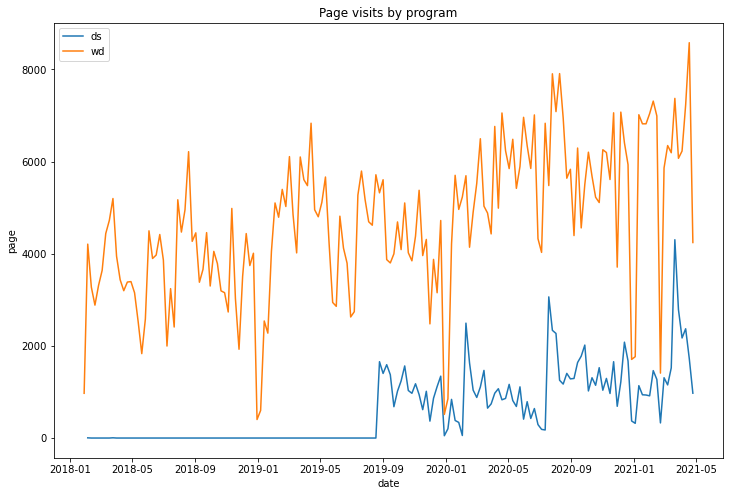

In [589]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df3, x=df3.index, y='page', label='ds')
sns.lineplot(data=df4, x=df4.index, y='page', label='wd')
plt.title('Page visits by program')
plt.legend()
plt.show()

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

### 7. Which lessons are least accessed? 

### 8. Anything else?

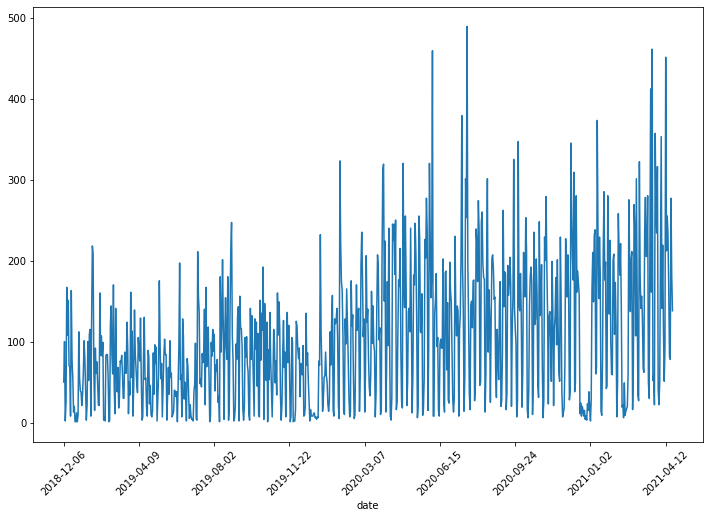

In [307]:
plt.figure(figsize=(12,8))
df[df.cohort == 28].groupby('date').page.count().plot()
plt.xticks(rotation=45)
plt.show()